# Utilizing a Unique Dataset to Advance Affordable Housing

In this document, we first clean the dataset and then apply data analysis methods to analyze the dataset in order to identify the factors that influence house prices. We hope that the results of our analysis can help buyers allocate funds more effectively, find suitable investment properties, and reduce the potential impact of appraisal gaps.

In [1]:
import numpy as np
import pandas as pd

## [0. Data Description of Columns](https://docs.google.com/document/d/125dTz235fhXQIeWGg6f2dRNBOwc8-qp5N8hdvt0uC1s/edit)

The link above provides descriptions of the columns in our dataset. This can help readers better understand the meaning conveyed by each column.

## 1. Data Cleaning

### 1.1 Load Data

In [2]:
capstone = pd.read_excel('/Users/mylittlepuppy/Desktop/Properties.xlsx')

After loading the data, we used the head( ) method to view the first five rows of the dataset. By examining the first five rows, we observed that there are many missing values in the dataset.

In [3]:
capstone.head()

,NCST ID (c),Related Buyer - Company Name (b) - Buyer Name,Related Buyer - Company Name (b) - Public Entity?,Related Buyer - Company Name (b) - Non-Profit,Related Buyer - Company Name (b) - NCST Sponsored SDP?,SDP Inspection Eligible?,Related Seller - Company Name (c),Program (c),Addr - Street (c),Addr - City (c),...,Family Ethnicity (b),Race,Disability,Veteran Occupant? (b),STATUS - Reporting Compliance,Latitude (c),Longitude (c),INSP - Inspection Type,Rehab Has Started - NCST Admin Review,Triage?
0,317644,2 God B The Glory Women Housing Program,no,yes,no,no,Wells Fargo,WF Donation,5266 CORDELIA AVE,BALTIMORE,...,NaN,NaN,NaN,NaN,DEACTIVATED,39.346574,-76.682900,NaN,no,no
1,456268,24:1 Community Land Trust,no,yes,no,no,CRC - Seller,Donations,4200 EDGEWOOD BLVD,SAINT LOUIS,...,NaN,NaN,NaN,NaN,DEACTIVATED,38.698404,-90.278309,NaN,no,no
2,216842,4-Sight Counseling,no,yes,no,no,Bank of America,Donations,13589 E SUNRISE LAKE DR,DE SOTO,...,White,NaN,NaN,No,COMPLETE,38.049709,-90.531806,NaN,no,no
3,250904,4-Sight Counseling,no,yes,no,no,Wells Fargo,WF Donation,133 COOK AVE,CHAFFEE,...,NaN,NaN,NaN,No,EXEMPT - NSP,37.182950,-89.654399,NaN,no,no
4,126778,55TH AND STATE REDEVELOPMENT,no,yes,no,no,REO Clearinghouse,Donations,8921 S PARNELL AVE,CHICAGO,...,NaN,NaN,NaN,No,EXEMPT,41.731917,-87.637064,NaN,no,no


### 1.2 Basic Information of Dataset

 Next, we obtain information about the data frame, including a list of column names, shape (number of rows and columns), data types, and descriptive statistics.

In [4]:
#查看dataframe的列名
capstone.columns.values.tolist()

['NCST ID (c)',
 'Related Buyer - Company Name (b) - Buyer Name',
 'Related Buyer - Company Name (b) - Public Entity?',
 'Related Buyer - Company Name (b) - Non-Profit',
 'Related Buyer - Company Name (b) - NCST Sponsored SDP?',
 'SDP Inspection Eligible?',
 'Related Seller - Company Name (c)',
 'Program (c)',
 'Addr - Street (c)',
 'Addr - City (c)',
 'Addr - State (c)',
 'Addr - Zip Code (c)',
 'Addr - County (c)',
 'Addr - CBSA (c)',
 'NSI Market',
 'Prop Type (c)',
 'Property Type (NEW)',
 'Unit Count',
 'Closed Dt (c)',
 'FMV (c)',
 'Adjustment (c)',
 'Sales Amt (c)',
 'Seller Contribution (c)',
 'Value Band',
 'Source of Funds (c)',
 'Disposition Method (b)',
 'Disposition Method (NEW)',
 'Prop Closing Costs',
 'Prop Demolished (b)',
 'Demo Cost (b)',
 'Prop Subsidy',
 'Cost of Capital-Holding Cost (b)',
 'Total Rehab Cost (b)',
 'Time to Rehab Start',
 'Rehab Begin Dt (b)',
 'Rehab Completion Dt (b)',
 'Rehab Duration',
 'Prop List Dt (b)',
 'Prop Resale Dt (b)',
 'Prop Resale P

In [5]:
#dataframe的大小，一共多少数据
capstone.shape

(28044, 62)

In [6]:
#查看数据的信息，包括每个字段的名称、非空数量、字段的数据类型
capstone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28044 entries, 0 to 28043
Data columns (total 62 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   NCST ID (c)                                             28044 non-null  int64  
 1   Related Buyer - Company Name (b) - Buyer Name           28044 non-null  object 
 2   Related Buyer - Company Name (b) - Public Entity?       28044 non-null  object 
 3   Related Buyer - Company Name (b) - Non-Profit           28044 non-null  object 
 4   Related Buyer - Company Name (b) - NCST Sponsored SDP?  28044 non-null  object 
 5   SDP Inspection Eligible?                                28044 non-null  object 
 6   Related Seller - Company Name (c)                       28044 non-null  object 
 7   Program (c)                                             28044 non-null  object 
 8   Addr - Street (c)                   

### 1.3 Seperate Dataframe Based on Form of Column

For the convenience of analysis and filling in missing data, we divide the columns into two types: numerical columns and categorical columns. Numerical columns refer to columns with numerical values, while categorical columns refer to columns with categorical values.

In [7]:
# 确定数值型列
numeric_columns = capstone.select_dtypes(include=["int", "float"]).columns

# 确定分类型列
categorical_columns = capstone.select_dtypes(include=["object"]).columns

print("Numeric Columns:")
print(numeric_columns)

print("Categorical Columns:")
print(categorical_columns)

Numeric Columns:
Index(['NCST ID (c)', 'Addr - Zip Code (c)', 'FMV (c)', 'Adjustment (c)',
       'Sales Amt (c)', 'Seller Contribution (c)', 'Prop Closing Costs',
       'Demo Cost (b)', 'Prop Subsidy', 'Cost of Capital-Holding Cost (b)',
       'Total Rehab Cost (b)', 'Time to Rehab Start', 'Rehab Duration',
       'Prop Resale Prc (b)', 'Time on Market - Resale',
       'Net Sales Proceeds (b)', 'Rental Monthly Lease Amt (b)',
       'Time on Market - Rental', 'Buyer Closing Costs Paid by You (b)',
       'Latitude (c)', 'Longitude (c)'],
      dtype='object')
Categorical Columns:
Index(['Related Buyer - Company Name (b) - Buyer Name',
       'Related Buyer - Company Name (b) - Public Entity?',
       'Related Buyer - Company Name (b) - Non-Profit',
       'Related Buyer - Company Name (b) - NCST Sponsored SDP?',
       'SDP Inspection Eligible?', 'Related Seller - Company Name (c)',
       'Program (c)', 'Addr - Street (c)', 'Addr - City (c)',
       'Addr - State (c)', 'Addr - Cou

### 1.4 Fill in Missing Values

For categorical columns, we fill the missing values in each column with the mode of that column. For numerical columns, we fill the missing values in each column with the mean of that column.

In [8]:
# 缺失值填充
# 填充Categorical（分类）值列使用mode（众数）
categorical_columns = ['Related Buyer - Company Name (b) - Buyer Name',
       'Related Buyer - Company Name (b) - Public Entity?',
       'Related Buyer - Company Name (b) - Non-Profit',
       'Related Buyer - Company Name (b) - NCST Sponsored SDP?',
       'SDP Inspection Eligible?', 'Related Seller - Company Name (c)',
       'Program (c)', 'Addr - Street (c)', 'Addr - City (c)',
       'Addr - State (c)', 'Addr - County (c)', 'Addr - CBSA (c)',
       'NSI Market', 'Prop Type (c)', 'Property Type (NEW)', 'Unit Count',
       'Closed Dt (c)', 'Value Band', 'Source of Funds (c)',
       'Disposition Method (b)', 'Disposition Method (NEW)',
       'Prop Demolished (b)', 'Rehab Begin Dt (b)', 'Rehab Completion Dt (b)',
       'Prop List Dt (b)', 'Prop Resale Dt (b)',
       'Owner/Occupant Verification? (b)', 'Occupant 80% AMI? (b)',
       'Homebuyer Counseling Provided? (b)', 'Rental Lease Start Dt (b)',
       'End Buyer Incentive', 'Head of Household Age (b)',
       'Primary Mortgagor Gender (b)', 'Family Ethnicity (b)', 'Race',
       'Disability', 'Veteran Occupant? (b)', 'STATUS - Reporting Compliance',
       'INSP - Inspection Type', 'Rehab Has Started - NCST Admin Review',
       'Triage?']  
capstone[categorical_columns] = capstone[categorical_columns].fillna(capstone[categorical_columns].mode().iloc[0])

# 填充Numerical（数值）值列使用mean（平均值）
numerical_columns = ['NCST ID (c)', 'Addr - Zip Code (c)', 'FMV (c)', 'Adjustment (c)',
       'Sales Amt (c)', 'Seller Contribution (c)', 'Prop Closing Costs',
       'Demo Cost (b)', 'Prop Subsidy', 'Cost of Capital-Holding Cost (b)',
       'Total Rehab Cost (b)', 'Time to Rehab Start', 'Rehab Duration',
       'Prop Resale Prc (b)', 'Time on Market - Resale',
       'Net Sales Proceeds (b)', 'Rental Monthly Lease Amt (b)',
       'Time on Market - Rental', 'Buyer Closing Costs Paid by You (b)',
       'Latitude (c)', 'Longitude (c)'] 
capstone[numerical_columns] = capstone[numerical_columns].fillna(capstone[numerical_columns].mean())

### 1.5 Remove Duplicate Records

By performing the following operation, we have removed duplicate records from the dataset.Removing duplicate records helps us maintain data consistency and accuracy for more reliable analysis and modeling.

In [9]:
# 删除重复的行
capstone = capstone.drop_duplicates()

### 1.6 Check Dataframe after Data Cleaning

After completing the data cleaning process, we check the first five rows of the dataset. At this point, we can see that there are no missing values or duplicate records in the dataset.

In [10]:
capstone.head()

,NCST ID (c),Related Buyer - Company Name (b) - Buyer Name,Related Buyer - Company Name (b) - Public Entity?,Related Buyer - Company Name (b) - Non-Profit,Related Buyer - Company Name (b) - NCST Sponsored SDP?,SDP Inspection Eligible?,Related Seller - Company Name (c),Program (c),Addr - Street (c),Addr - City (c),...,Family Ethnicity (b),Race,Disability,Veteran Occupant? (b),STATUS - Reporting Compliance,Latitude (c),Longitude (c),INSP - Inspection Type,Rehab Has Started - NCST Admin Review,Triage?
0,317644,2 God B The Glory Women Housing Program,no,yes,no,no,Wells Fargo,WF Donation,5266 CORDELIA AVE,BALTIMORE,...,White,Occupant Declines to Disclose,Occupant Declines to Disclose,No,DEACTIVATED,39.346574,-76.682900,Post-Rehab,no,no
1,456268,24:1 Community Land Trust,no,yes,no,no,CRC - Seller,Donations,4200 EDGEWOOD BLVD,SAINT LOUIS,...,White,Occupant Declines to Disclose,Occupant Declines to Disclose,No,DEACTIVATED,38.698404,-90.278309,Post-Rehab,no,no
2,216842,4-Sight Counseling,no,yes,no,no,Bank of America,Donations,13589 E SUNRISE LAKE DR,DE SOTO,...,White,Occupant Declines to Disclose,Occupant Declines to Disclose,No,COMPLETE,38.049709,-90.531806,Post-Rehab,no,no
3,250904,4-Sight Counseling,no,yes,no,no,Wells Fargo,WF Donation,133 COOK AVE,CHAFFEE,...,White,Occupant Declines to Disclose,Occupant Declines to Disclose,No,EXEMPT - NSP,37.182950,-89.654399,Post-Rehab,no,no
4,126778,55TH AND STATE REDEVELOPMENT,no,yes,no,no,REO Clearinghouse,Donations,8921 S PARNELL AVE,CHICAGO,...,White,Occupant Declines to Disclose,Occupant Declines to Disclose,No,EXEMPT,41.731917,-87.637064,Post-Rehab,no,no


# PCA Analysis

In [83]:
columns_to_keep = ['FMV (c)', 'Adjustment (c)','Sales Amt (c)', 'Seller Contribution (c)', 
                   'Prop Closing Costs',
                   'Demo Cost (b)', 'Prop Subsidy', 'Cost of Capital-Holding Cost (b)',
                   'Total Rehab Cost (b)', 'Time to Rehab Start', 'Rehab Duration',
                   'Prop Resale Prc (b)', 'Time on Market - Resale',
                   'Net Sales Proceeds (b)', 'Rental Monthly Lease Amt (b)',
                   'Time on Market - Rental', 'Buyer Closing Costs Paid by You (b)']

df2 = capstone[columns_to_keep]

In [84]:
df2

,FMV (c),Adjustment (c),Sales Amt (c),Seller Contribution (c),Prop Closing Costs,Demo Cost (b),Prop Subsidy,Cost of Capital-Holding Cost (b),Total Rehab Cost (b),Time to Rehab Start,Rehab Duration,Prop Resale Prc (b),Time on Market - Resale,Net Sales Proceeds (b),Rental Monthly Lease Amt (b),Time on Market - Rental,Buyer Closing Costs Paid by You (b)
Prop Resale Dt (b),,,,,,,,,,,,,,,,,
2014-04-08,1.000000,0.000000,1.0,11238.131166,10533.966787,10198.296696,33873.87125,7123.658386,3700.00000,223.000000,83.000000,143322.658024,426.64428,45109.665613,3729.975385,81.136972,4412.51216
2014-04-08,79287.588227,12021.033133,1.0,11238.131166,10533.966787,10198.296696,33873.87125,7123.658386,48393.59611,378.944295,-206.334197,143322.658024,426.64428,45109.665613,3729.975385,81.136972,4412.51216
2014-10-15,0.000000,0.000000,1.0,11238.131166,10533.966787,10198.296696,33873.87125,7123.658386,18533.00000,231.000000,71.000000,24000.000000,330.00000,1000.000000,3729.975385,81.136972,4412.51216
2014-04-08,1.000000,0.000000,1.0,11238.131166,10533.966787,7740.000000,33873.87125,7123.658386,48393.59611,378.944295,-206.334197,10000.000000,426.64428,-2500.000000,3729.975385,81.136972,4412.51216
2014-04-08,1.000000,0.000000,1.0,11238.131166,10533.966787,10198.296696,33873.87125,7123.658386,48393.59611,378.944295,-206.334197,143322.658024,426.64428,45109.665613,3729.975385,81.136972,4412.51216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-04-08,19000.000000,8172.000000,10828.0,11238.131166,592.000000,10198.296696,33873.87125,7123.658386,48393.59611,378.944295,-206.334197,143322.658024,426.64428,45109.665613,3729.975385,81.136972,4412.51216
2014-04-08,28600.000000,5459.000000,23141.0,11238.131166,10533.966787,10198.296696,33873.87125,7123.658386,48393.59611,378.944295,-206.334197,143322.658024,426.64428,45109.665613,3729.975385,81.136972,4412.51216
2014-04-08,56000.000000,26000.000000,30000.0,11238.131166,10533.966787,10198.296696,33873.87125,7123.658386,48393.59611,378.944295,-206.334197,143322.658024,426.64428,45109.665613,3729.975385,81.136972,4412.51216


In [85]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
# PCA module
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import r2_score

In [98]:
# Separate the features (X) from the target variable (y)
X = df2.drop('Prop Resale Prc (b)', axis=1)
y = df2['Prop Resale Prc (b)']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Determine the number of components to retain
num_components_to_retain = 5  # Choose the desired number of components to retain

# Get the top features contributing to the retained components
top_features = pd.DataFrame(pca.components_, columns=X.columns).abs().sum().nlargest(num_components_to_retain).index

# Select the top features from the original dataset
X_selected = X[top_features]

# Print the explained variance ratio for each component
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {ratio}")

# Print the top features contributing to the retained components
print(f"\nTop {num_components_to_retain} Features:")
print(top_features)

Principal Component 1: 0.15321985018942225
Principal Component 2: 0.12498812020823773
Principal Component 3: 0.07254948048877435
Principal Component 4: 0.06882133087233766
Principal Component 5: 0.06408321730758261
Principal Component 6: 0.06256688623437845
Principal Component 7: 0.0625245765162135
Principal Component 8: 0.062486569783977465
Principal Component 9: 0.06243894168020292
Principal Component 10: 0.061861536888988315
Principal Component 11: 0.0593075291827694
Principal Component 12: 0.05436646816638774
Principal Component 13: 0.05305431650146421
Principal Component 14: 0.03655226731102528
Principal Component 15: 0.0011776369592279533
Principal Component 16: 1.2717090102084678e-06

Top 5 Features:
Index(['Prop Closing Costs', 'Cost of Capital-Holding Cost (b)',
       'Time on Market - Rental', 'Buyer Closing Costs Paid by You (b)',
       'Prop Subsidy'],
      dtype='object')


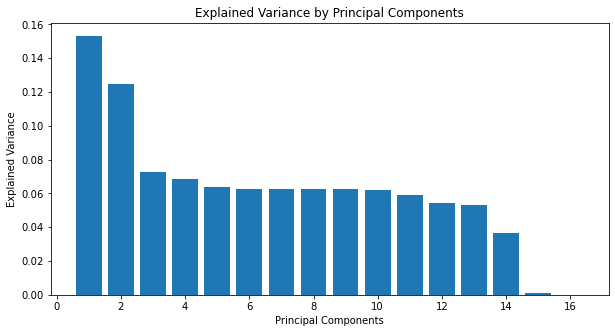

In [103]:
import matplotlib.pyplot as plt
import numpy as np

# Your explained variance ratios
explained_variance_ratio = [
    0.15321985018942225,
    0.12498812020823773,
    0.07254948048877435,
    0.06882133087233766,
    0.06408321730758261,
    0.06256688623437845,
    0.0625245765162135,
    0.062486569783977465,
    0.06243894168020292,
    0.061861536888988315,
    0.0593075291827694,
    0.05436646816638774,
    0.05305431650146421,
    0.03655226731102528,
    0.0011776369592279533,
    1.2717090102084678e-06
]

# Creating an array with the number of components
components = np.array(range(1,17))  # Now you have 16 components

# Creating the bar chart
plt.figure(figsize=(10,5))
plt.bar(components, explained_variance_ratio)

# Adding labels and title
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Components')

# Displaying the plot
plt.show()

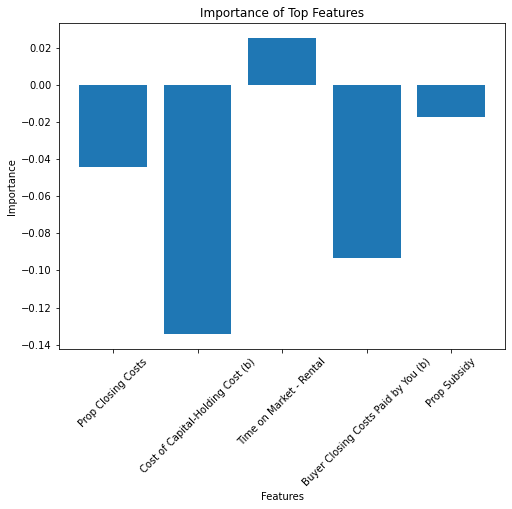

In [94]:
import matplotlib.pyplot as plt

# Create a bar plot to visualize the importance of top features
plt.figure(figsize=(8, 6))
plt.bar(range(len(top_features)), pca.components_[0, X.columns.get_indexer(top_features)])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Importance of Top Features')
plt.xticks(range(len(top_features)), top_features, rotation=45)
plt.show()


In [99]:
importance_values = pca.components_[0, X.columns.get_indexer(top_features)]  # 获取每个特征的重要性值

for feature, importance in zip(top_features, importance_values):
    print(f"{feature}: {importance:.3f}")


Prop Closing Costs: -0.044
Cost of Capital-Holding Cost (b): -0.135
Time on Market - Rental: 0.025
Buyer Closing Costs Paid by You (b): -0.093
Prop Subsidy: -0.017


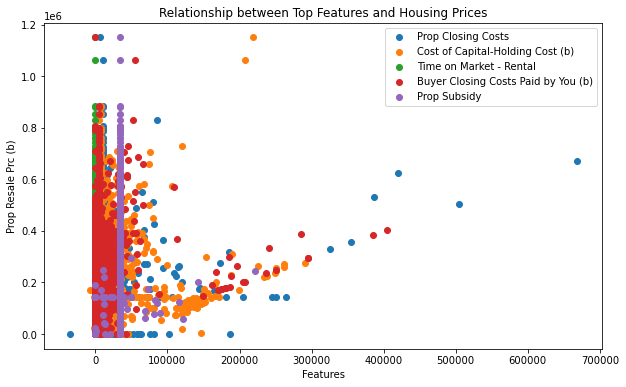

In [95]:
import matplotlib.pyplot as plt

# Create scatter plots to visualize the relationship between top features and housing prices
plt.figure(figsize=(10, 6))

for feature in top_features:
    plt.scatter(df2[feature], df2['Prop Resale Prc (b)'], label=feature)

plt.xlabel('Features')
plt.ylabel('Prop Resale Prc (b)')
plt.title('Relationship between Top Features and Housing Prices')
plt.legend()
plt.show()


According to the results of PCA analysis:

Principal Component 1: 0.1532
Principal Component 2: 0.1250
Principal Component 3: 0.0725
Principal Component 4: 0.0688
Principal Component 5: 0.0641

Top 5 Features:

Prop Closing Costs
Cost of Capital-Holding Cost (b)
Time on Market - Rental
Buyer Closing Costs Paid by You (b)
Prop Subsidy
The PCA analysis reveals that the top 5 features, including Prop Closing Costs, Cost of Capital-Holding Cost (b), Time on Market - Rental, Buyer Closing Costs Paid by You (b), and Prop Subsidy, have significant contributions to the variance in housing prices.

Principal Component 1 has the highest explained variance ratio, indicating that Prop Closing Costs, Cost of Capital-Holding Cost (b), Time on Market - Rental, Buyer Closing Costs Paid by You (b), and Prop Subsidy are the most important factors in determining housing prices across different locations. These features contribute significantly to the overall variability observed in the dataset.

Principal Components 2, 3, 4, and 5 also contribute to the variance in housing prices, although the specific features associated with these components are not mentioned.

In summary, based on the PCA analysis, we can conclude that the Prop Closing Costs, Cost of Capital-Holding Cost (b), Time on Market - Rental, Buyer Closing Costs Paid by You (b), and Prop Subsidy are important factors in determining housing prices in different locations. However, further analysis and research are needed to understand the precise contributions of other features and their impact on housing prices.

In [105]:
# Separate the features (X) from the target variable (y)
X = df2.drop('Sales Amt (c)', axis=1)
y = df2['Sales Amt (c)']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Determine the number of components to retain
num_components_to_retain = 5  # Choose the desired number of components to retain

# Get the top features contributing to the retained components
top_features2 = pd.DataFrame(pca.components_, columns=X.columns).abs().sum().nlargest(num_components_to_retain).index

# Select the top features from the original dataset
X_selected = X[top_features]

# Print the explained variance ratio for each component
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {ratio}")

# Print the top features contributing to the retained components
print(f"\nTop {num_components_to_retain} Features:")
print(top_features2)

Principal Component 1: 0.14040541441379278
Principal Component 2: 0.1249920561573526
Principal Component 3: 0.07049058503764845
Principal Component 4: 0.06862813905538027
Principal Component 5: 0.06411416137647277
Principal Component 6: 0.06265983957074017
Principal Component 7: 0.06252322746219863
Principal Component 8: 0.062491214248853
Principal Component 9: 0.06241496191293688
Principal Component 10: 0.06198190297139253
Principal Component 11: 0.05939080581811595
Principal Component 12: 0.054995877282322254
Principal Component 13: 0.05292646896438995
Principal Component 14: 0.034346510790693265
Principal Component 15: 0.01763756131219173
Principal Component 16: 1.273625518690111e-06

Top 5 Features:
Index(['Total Rehab Cost (b)', 'Prop Closing Costs', 'Prop Subsidy',
       'Buyer Closing Costs Paid by You (b)', 'Time on Market - Rental'],
      dtype='object')


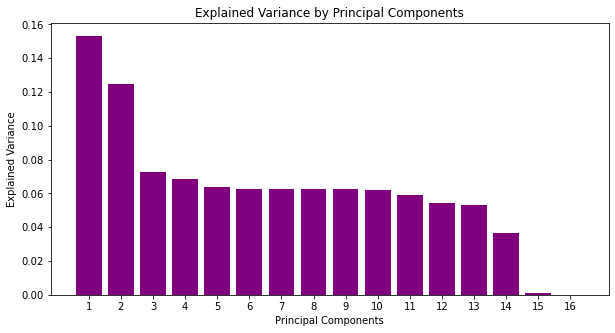

In [111]:
import matplotlib.pyplot as plt
import numpy as np

# Your explained variance ratios
explained_variance_ratio = [
    0.15321985018942225,
    0.12498812020823773,
    0.07254948048877435,
    0.06882133087233766,
    0.06408321730758261,
    0.06256688623437845,
    0.0625245765162135,
    0.062486569783977465,
    0.06243894168020292,
    0.061861536888988315,
    0.0593075291827694,
    0.05436646816638774,
    0.05305431650146421,
    0.03655226731102528,
    0.0011776369592279533,
    1.2717090102084678e-06
]

# Creating an array with the number of components
components = np.array(range(1, 17))  # Now you have 16 components

# Creating the bar chart
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(components, explained_variance_ratio, color='purple')

# Adding labels and title
ax.set_xlabel('Principal Components')
ax.set_ylabel('Explained Variance')
ax.set_title('Explained Variance by Principal Components')

# Set x-axis ticks and tick labels
ax.set_xticks(components)
ax.set_xticklabels(components)

# Displaying the plot
plt.show()

In [106]:
importance_values = pca.components_[0, X.columns.get_indexer(top_features2)]  # 获取每个特征的重要性值

for feature, importance in zip(top_features2, importance_values):
    print(f"{feature}: {importance:.3f}")

Total Rehab Cost (b): -0.282
Prop Closing Costs: -0.066
Prop Subsidy: -0.025
Buyer Closing Costs Paid by You (b): -0.156
Time on Market - Rental: 0.025


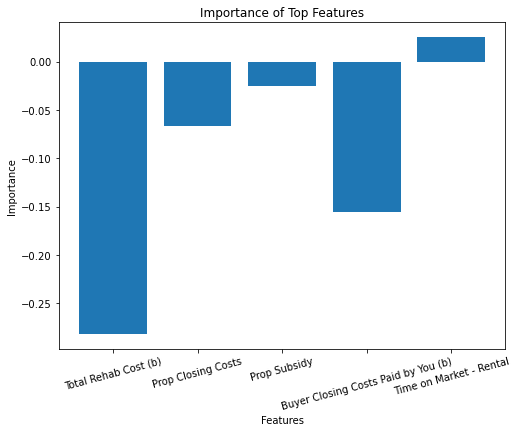

In [117]:
import matplotlib.pyplot as plt

# Create a bar plot to visualize the importance of top features
plt.figure(figsize=(8, 6))
plt.bar(range(len(top_features)), pca.components_[0, X.columns.get_indexer(top_features2)])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Importance of Top Features')
plt.xticks(range(len(top_features2)), top_features2, rotation = 15)
plt.show()

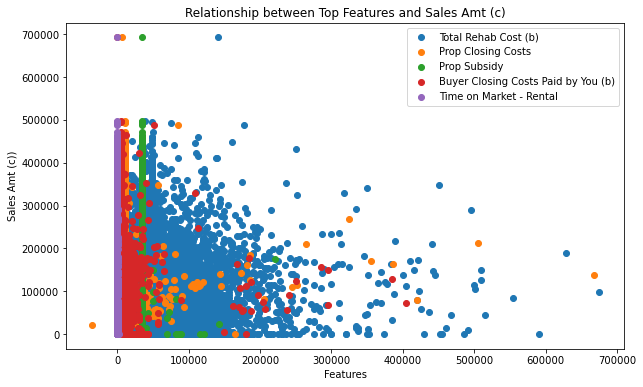

In [107]:
import matplotlib.pyplot as plt

# Create scatter plots to visualize the relationship between top features and housing prices
plt.figure(figsize=(10, 6))

for feature in top_features2:
    plt.scatter(df2[feature], df2['Sales Amt (c)'], label=feature)

plt.xlabel('Features')
plt.ylabel('Sales Amt (c))')
plt.title('Relationship between Top Features and Sales Amt (c)')
plt.legend()
plt.show()
